In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [182]:
file_path = "/Users/samantha/Desktop/Data-Analyst/Project-1/Cleaned_Data.xlsx"
car_data = pd.read_excel(file_path, sheet_name="Cleaned_Data")
income_data = pd.read_excel(file_path, sheet_name="Average_Income_By_Year")

In [183]:
# Filter car price data for years 2009-2018
car_data_filtered = car_data[car_data['Year'].between(2009, 2018)]

In [185]:
# Convert price column to numeric
car_data_filtered.loc[:, price_column] = pd.to_numeric(car_data_filtered[price_column], errors='coerce')

In [186]:
# Define inflation rates for each year
inflation_rates = {
    2009: 0.17,
    2010: 0.152,
    2011: 0.116,
    2012: 0.094,
    2013: 0.078,
    2014: 0.061,
    2015: 0.059,
    2016: 0.046,
    2017: 0.024
}
# Calculate inflation-adjusted car prices
for year, rate in inflation_rates.items():
    car_data_filtered.loc[car_data_filtered['Year'] == year, 'Price'] *= (1 + rate)

In [187]:
# Calculate the average car price per year
average_price_per_year = car_data_filtered.groupby(year_column)[price_column].mean().astype(int)

In [188]:
# Select the columns for the years 2009 to 2018
selected_columns = income_data.loc[:, 2018:2009]

In [189]:
# Calculate the mean income for each year
mean_income_per_year = income_data.mean().astype(int)

In [190]:
# Define inflation rates for each year data was adjusted to 2022 inflation originally
income_inflation_rates = {
    2009: -0.194,
    2010: -0.19,
    2011: -0.185,
    2012: -0.181,
    2013: -0.178,
    2014: -0.175,
    2015: -0.176,
    2016: -0.17,
    2017: -0.162,
    2018: -0.142
}

In [192]:
# Iterate over index and values and adjust income based on inflation rates
for year, income in mean_income_per_year.items():
    if year in income_inflation_rates:
        rate = income_inflation_rates[year]
        mean_income_per_year[year] *= (1 + rate)

In [194]:
# Convert income values to integers
mean_income_per_year = mean_income_per_year.astype(int)

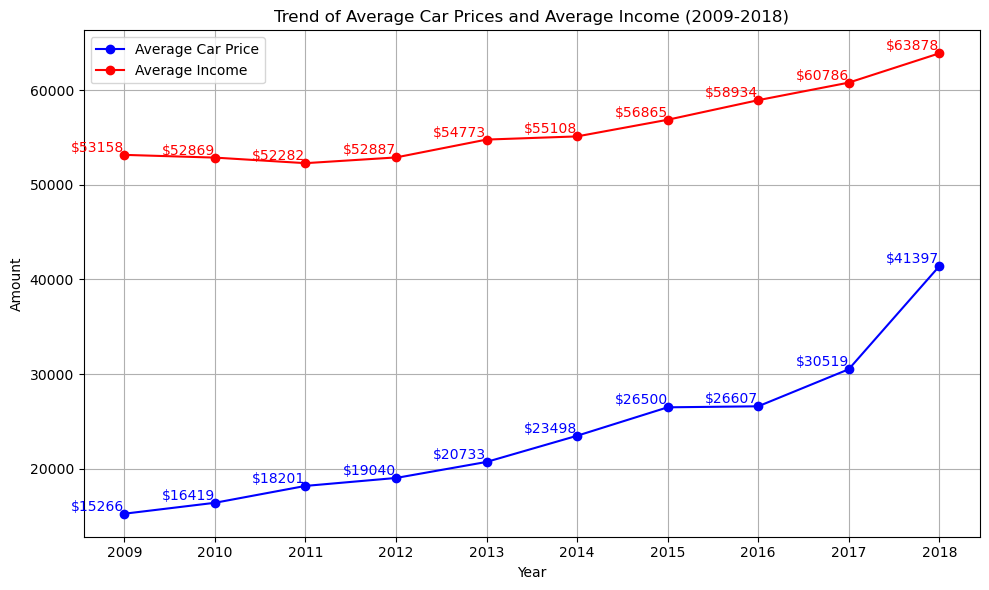

In [196]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', color='b', label='Average Car Price')
plt.plot(mean_income_per_year.index, mean_income_per_year.values, marker='o', color='r', label='Average Income')
plt.title('Trend of Average Car Prices and Average Income (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show every year on the x-axis
plt.xticks(average_price_per_year.index)

# Add labels for each point
for year, price in zip(average_price_per_year.index, average_price_per_year.values):
    plt.text(year, price, f"${price}", ha='right', va='bottom', fontsize=10, color='blue')

for year, income in zip(mean_income_per_year.index, mean_income_per_year.values):
    plt.text(year, income, f"${income}", ha='right', va='bottom', fontsize=10, color='red')

# Show plot
plt.show()

In [198]:
# Calculate the percentage of car price to income
percentage_change = (average_price_per_year / mean_income_per_year) * 100

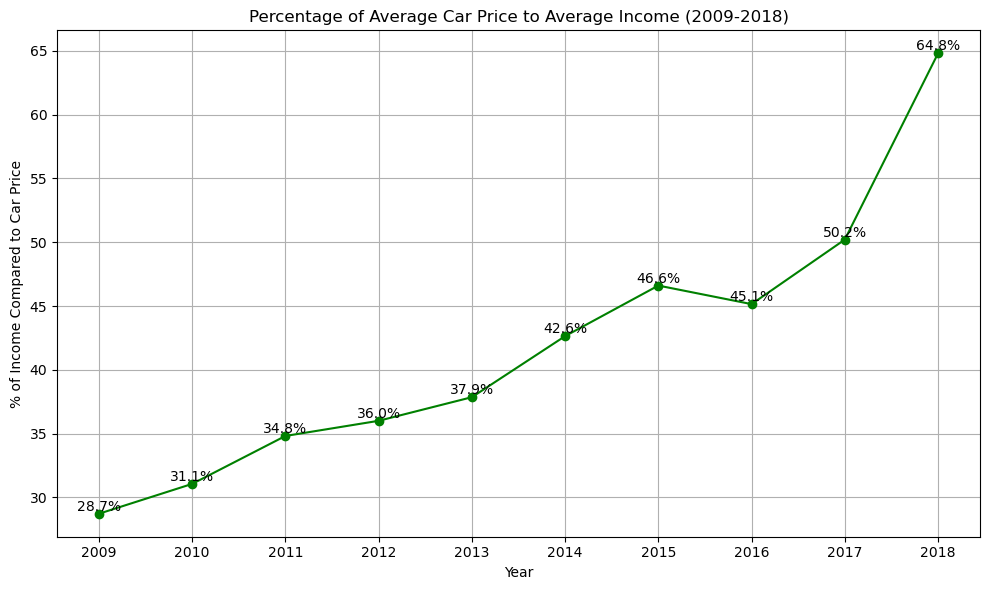

In [199]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(percentage_change.index, percentage_change.values, marker='o', color='g')
plt.title('Percentage of Average Car Price to Average Income (2009-2018)')
plt.xlabel('Year')
plt.ylabel('% of Income Compared to Car Price')
plt.grid(True)
plt.tight_layout()

# Label each point with the percentage value
for year, percentage in zip(percentage_change.index, percentage_change.values):
    plt.text(year, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Show every year on the x-axis
plt.xticks(percentage_change.index)

# Show plot
plt.show()